## Learning Objectives

At the end of the experiment, you will be able to

*   plot frequency graphs
*   perform normal distribution

### Dataset

#### Description

The dataset used in this experiment is IPL matches dataset

In [1]:
#@title Run this cell to download the dataset
!wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/ipl.csv

--2021-08-28 08:09:42--  https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/ipl.csv
Resolving cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)... 172.105.52.210
Connecting to cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140113 (137K) [application/octet-stream]
Saving to: ‘ipl.csv’

ipl.csv             100%[===================>] 136.83K   195KB/s    in 0.7s    

2021-08-28 08:09:44 (195 KB/s) - ‘ipl.csv’ saved [140113/140113]



### Importing required packages

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Load the data

In [3]:
matches = pd.read_csv('ipl.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Cumulative relative frequency graph

Let's take `win_by_wickets` column from the dataset and plot a frequency distribution graph.

X-axis - Win by wickets (value from 1 to 10), Y-axis - Number of instances (or frequency) of win-by-wickets margin

In [4]:
matches[matches.win_by_wickets > 0].win_by_wickets.value_counts(sort=False)

1      3
2      6
3     18
4     41
5     71
6     85
7     80
8     54
9     37
10    11
Name: win_by_wickets, dtype: int64

In [5]:
matches[matches.win_by_wickets > 0].win_by_wickets.mean()

6.238916256157635

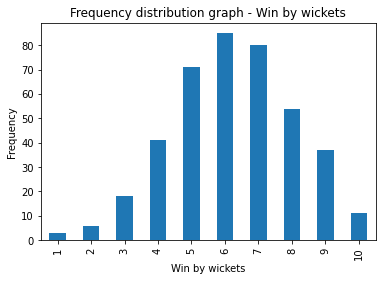

In [6]:
win_by_wickets_data = matches[matches.win_by_wickets > 0].win_by_wickets
win_by_wickets_freq = win_by_wickets_data.value_counts(sort = False)
win_by_wickets_freq.plot.bar()
plt.title("Frequency distribution graph - Win by wickets")
plt.xlabel("Win by wickets")
plt.ylabel("Frequency")
plt.show()

Now, let's plot the **Relative frequency distribution graph** for the same data. Here in **Y-axis**, instead of showing the frequency, we show the **percentage** of the value. We can use the `normalize = True` argument for `pandas.Series.value_counts` method

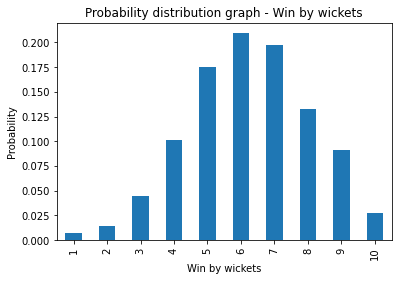

In [7]:
win_by_wickets_data = matches[matches.win_by_wickets > 0].win_by_wickets
win_by_wickets_rel_freq = win_by_wickets_data.value_counts(sort = False, normalize = True)
win_by_wickets_rel_freq.plot.bar()
plt.title("Probability distribution graph - Win by wickets")
plt.xlabel("Win by wickets")
plt.ylabel("Probability")
plt.show()

From here, we can plot the **cumulative relative frequency graph** using `pandas.Series.cumsum` .

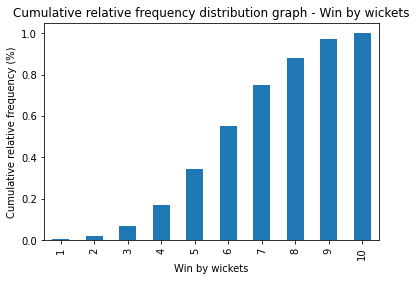

In [8]:
win_by_wickets_cumulative_freq = win_by_wickets_data.value_counts(sort = False, normalize = True).cumsum()
win_by_wickets_cumulative_freq.plot.bar()
plt.title("Cumulative relative frequency distribution graph - Win by wickets")
plt.xlabel("Win by wickets")
plt.ylabel("Cumulative relative frequency (%)")
plt.show()

### Normal distribution

To know more about stats.norm.pdf refer to the following [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) 

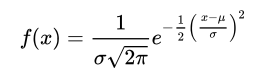

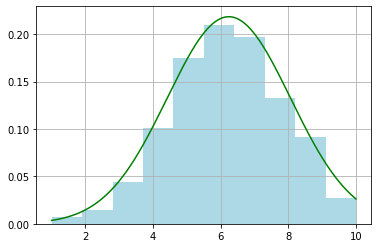

In [9]:
# Get mean (mu) and std (sigma)
win_by_wickets_mean = win_by_wickets_data.mean()
win_by_wickets_std = win_by_wickets_data.std()

# Plot histogram (normalized) - LIGHT-BLUE
# Here the actual frequency is ranging from 0 to 80 and we are normalizing the data to get all the values within the range of 0.0 to 0.20
win_by_wickets_data.hist(color='lightblue', weights = np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count())

# Normal distribution for random points between 1 to 10 with mean, std.
random_data = np.arange(1, 10, 0.001)
plt.plot(random_data, stats.norm.pdf(random_data, win_by_wickets_mean, win_by_wickets_std), color='green')
plt.show()

### Probability of winning the game who won the toss is?

In [10]:
len(matches[matches['toss_winner'] == matches['winner']])/len(matches)

0.5198412698412699

## Discrete Distributions

### Poisson Distribution

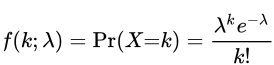

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
from scipy.stats import poisson
import pandas as pd

Horse_kicks = pd.read_csv('Poisson_Prussion Horse-Kick Data.csv').values
year = Horse_kicks[:, 1]
deaths = Horse_kicks[:, 1:11].flatten()

fig, ax = plt.subplots(1, 1)

mu = np.mean(deaths)
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99999, mu))
ax.hist(deaths)
ax.plot(x, poisson.pmf(x, mu)*200, 'r--', ms=8, label='poisson pmf')
ax.set_xlabel('Deaths due Horse kicks')
ax.set_ylabel('Expected frequency in a battle')

FileNotFoundError: ignored

## Bernouli Distribution

Simulation: http://www.randomservices.org/random/buffon/Buffon.html

Probability of falling outside the inner square is 0.36

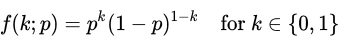

In [ ]:
from scipy.stats import bernoulli

Buffon_trail = pd.read_csv('/content/Buffon_trails.csv')
fig, ax = plt.subplots(1, 1)
cross = Buffon_trail.values[:-1, 1]

p = 0.36 
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
x = [0, 1] #np.arange(bernoulli.ppf(0.01, p), bernoulli.ppf(1.0, p))
ax.hist(cross)
ax.plot(x, bernoulli.pmf(x, p)*1356, 'bo', ms=8, label='bernoulli pmf')
ax.set_xlabel('Category')
ax.set_xticks([0, 1])
ax.set_xticklabels(['In', 'Out'])
ax.set_ylabel('Expected frequency')

### Uniform Distribution

Simulation: Dice Experiment

http://www.randomservices.org/random/dist/index.html